In [1]:
import numpy as np
import torch
import random
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM
import matplotlib.pyplot as plt
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:64'

import utils

%load_ext autoreload
%autoreload 2

/Users/paul/anaconda3/envs/acd/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Global variable model:

model_name = 'openai-community/gpt2' #"openai-community/gpt2-xl" #"meta-llama/Llama-2-7b-hf" #openai-community/gpt2-xl # 
dataset_path = 'datasets/ilikecats_20000.csv'

# Load model and dataset
model = utils.LinearFeatureWrapper(model_name, dataset_path, 'Animal', 'Non-Animal', False)
model.set_layers(model.model.transformer.h) # Depends on model! Typically model.model.model.layers

In [3]:
# Global variables after loading model and data 
num_detector_samples = 1024 # Number of samples to construct the detector

batch_size = None # Batch size for detector construction. 256 works well for Phi3 on ilikecats
max_tokens = None # If none, uses maximum length of the dataset

model.get_pos_neg_activations(num_detector_samples, max_tokens, batch_size)

Processing batch 1/2
Processing batch 1/2


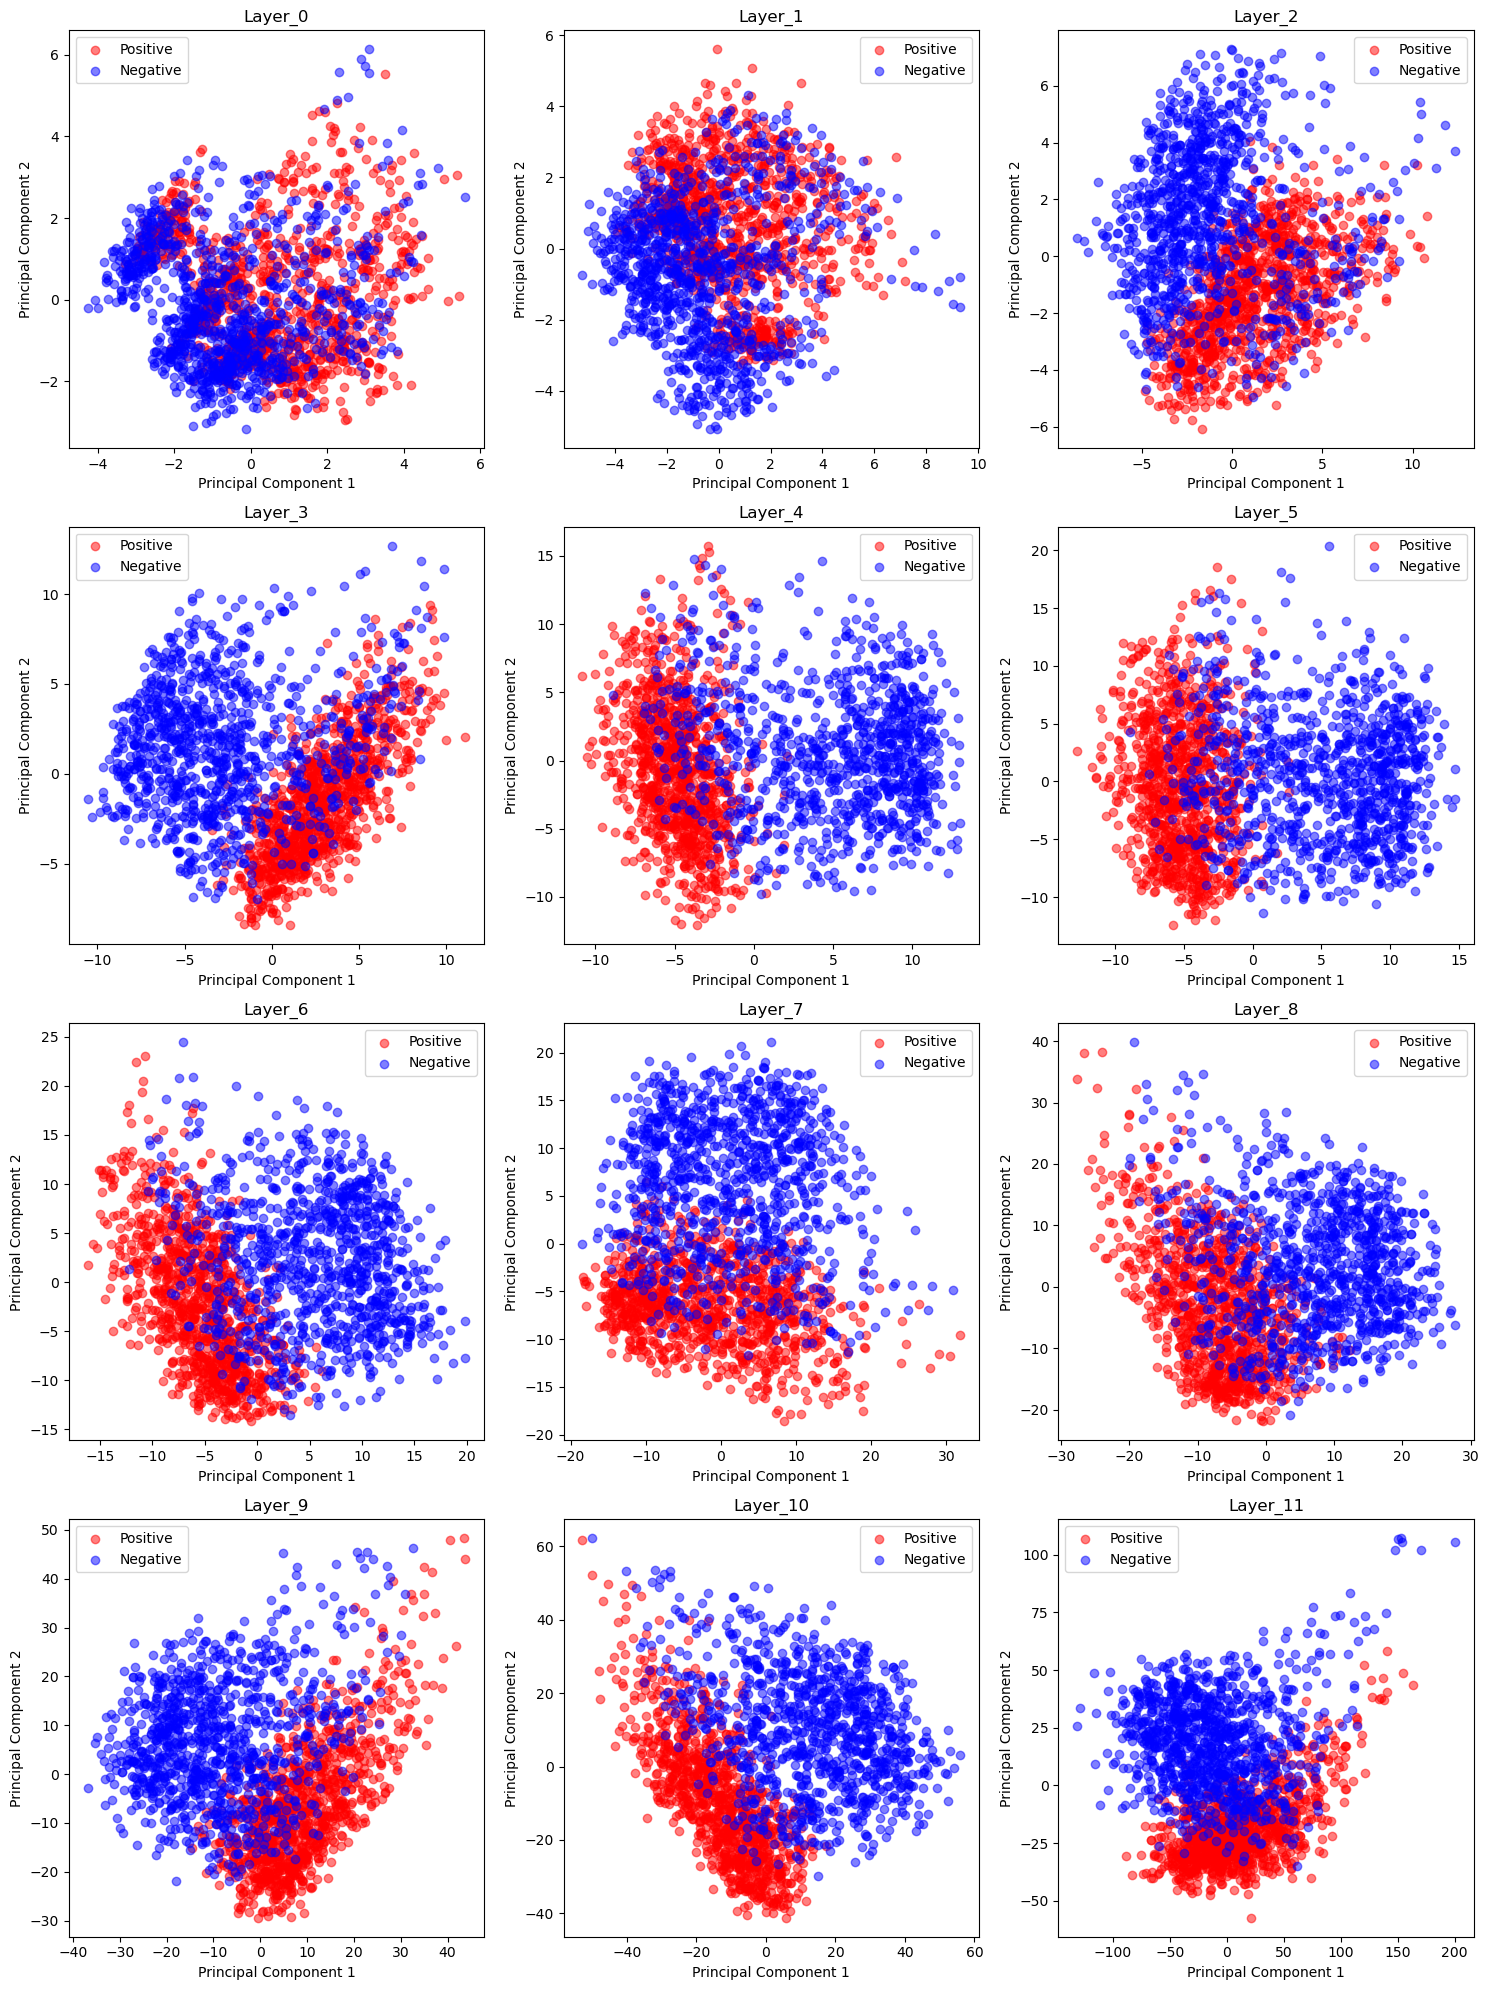

In [4]:
model.plot_pca()

In [5]:
model.calculate_detector_direction()

Processing batch 1/2


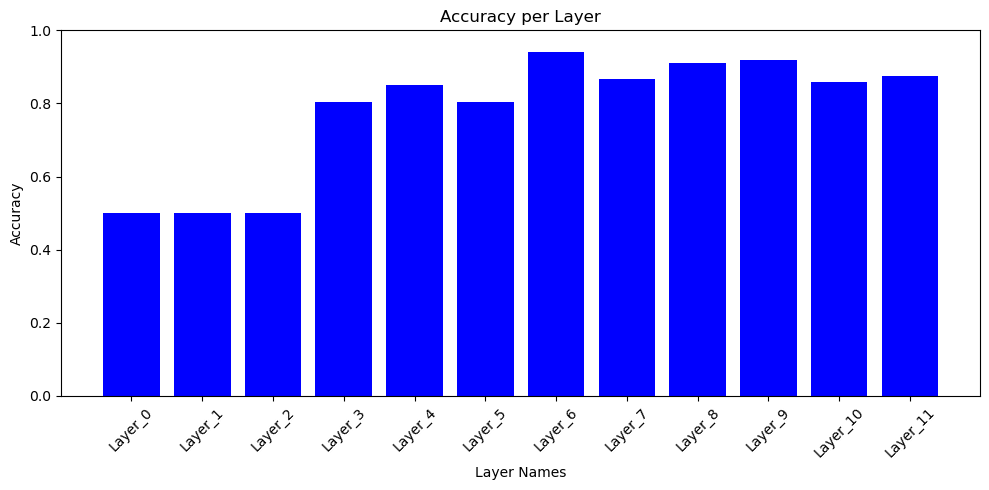

{'Layer_0': 0.5,
 'Layer_1': 0.5,
 'Layer_2': 0.5,
 'Layer_3': 0.8046875,
 'Layer_4': 0.8515625,
 'Layer_5': 0.8046875,
 'Layer_6': 0.94140625,
 'Layer_7': 0.8671875,
 'Layer_8': 0.91015625,
 'Layer_9': 0.91796875,
 'Layer_10': 0.859375,
 'Layer_11': 0.875}

In [6]:
# Get dataset for testing direction detector
num_test_samples = 256 # Number of samples to test the detector
batch_size = None # Batch size for detector construction. 256 works well for Phi3 on ilikecats
max_tokens = None # If none, uses maximum length of the dataset

test_dataset = dataset = utils.Dataset()
test_dataset.load_data(dataset_path, 'Animal', 'Non-Animal')
test_data, labels = test_dataset.combine_dataset_get_labels(num_test_samples)

model.evaluate_direction_detector(test_data, labels, max_tokens, batch_size)